[1.6424307678819472, 1.6424305781000448, 1.64244694756853, 1.6439735675994256, 1.7951245834958731, 2.3999540826433563, 4.315296046017676, 12.604653254067253, 120.31238793643011, 9039.264119653235, 9039.264153506969, 9039.2641197377, 9039.264163718195, 9039.264118485662]


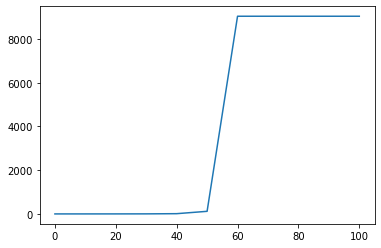

In [29]:
import numpy as np
from scipy.integrate import odeint
# INDUCTION OF IPTG AT t = 0:


# INTIAL CONDITIONS:
# [mRE] ~ 20 nM 
                          
#[RE] = 10 nM 

#[R2E] = 0

# [O_E] = 78.85 (95% of total OE)

#[I_E]= 0

#[I_2 R_E] = 0

#[MY_E] = 357 nM (20 nM * no. of mRNA = 20 * 10000/560)(THERE ARE 10000 LacY molecules)

#[Y_E] = 0

#[Y_exe] = 0

# [MT7 _E] = 20 nM 

# [T7_E] = 830 nM 
#there are 4600(2000 - 10000) molecules of RNAP - Bakshi S, Siryaporn A, Goulian M, Weisshaar JC. Superresolution imaging of ribosomes and RNA polymerase in live Escherichia coli cells. Mol Microbiol. 2012 Jul85(1):21-38. doi: 10.1111/j.1365-2958.2012.08081.x. p.26 right column top paragraphPubMed ID22624875
#but, True value  = 400, as there are 5- 20 RNAP per LAC induced gene, since we have 40 plasmid we have = 10*40 = 400 RNAP (X. Sunney Xie, Paul J. Choi, Gene-Wei Li, Nam Ki Lee, and Giuseppe Lia, 'Single-Molecule Approach to Molecular Biology in Living Bacterial Cells', Annu. Rev. Biophys. 2008. 37:p.419PubMed ID18573089)

#[MF_E] = 0

#[F_E] = 0


import matplotlib.pyplot as plt
alpha_MR = 0.23
lamda_MR = 0.462 
beta_R = 15 
k_2R = 50
k_n2R = 10**-3 
lamda_R = 0.2
k_R = 960
k_nR = 2.4
k_dr1 = 3* 10**(-7)
k_ndr1 =12 
lamda_R2 = 0.2
k_dr2 = 3* 10**(-7)
k_ndr2 = 4.8 * 10**-3
k_ft = 6 * 10**4
k_t = 0.92
lamda_I2R2 =0.2 
alpha_0 = 3.066 * 10**-23
alpha_1 = 0.5
lamda_MY = 0.462
beta_Y = 30
k_np =0.1 
k_p = 0.12
lamda_Y = 0.2
lamda_Ylex = 0.2
lamda_MT7 = 0.462 
beta_T7 = 6.116
lamda_pT7 = 0.2
n = 2
k_d = 3
alpha_MT = 0.5
alpha_leak = 3.066 * 10**-23
lamda_MF = 0.462
beta_F = 10.063
lamda_F = 0.1
tf = 1000
dt=0.001

t = np.arange(0,tf,dt)
x = [0,10,100,1000,10**4,2*10**4,3*10**4,4*10**4,5*10**4,6*10**4,7*10**4,8*10**4,9*10**4,1*10**5]#,2*10**5,3*10**5,4*10**5,5*10**5,6*10**5,7*10**5,8*10**5,9*10**5,10**6,2*10**6,4*10**6]#,6*10**6,8*10**6,10**7]#,#2*10**7,4*10**7,6*10**7,8*10**7,10**8#,2*10**8,4*10**8,6*10**8,8*10**8,10**9,10**10,10**11,10**12,10**13]

sib = []
for i in x:
    
    def dD(D,tm):
        Da,Db,Dc,Dd,De,Df,Dg,Dh,Di,Dj,Dk,Dl,Dm = D
        d1 = alpha_MR*(83) - lamda_MR*Da
        d2 = beta_R*Da - 2*k_2R*(Db)**2 + 2*k_n2R*Dc-lamda_R*Db
        d3 = 2*k_2R*(Da)**2 - 2*k_n2R*Dc-k_R*Dc*Dd+ k_nR*((83) - Dd)- k_dr1*Dc*(De)**2 + k_ndr1*Df-lamda_R2*Dc
        d4 = -k_R*Dc*Dd+k_nR*((83)-Dd)+k_dr2*((83)-Dd)*(De)**2-k_ndr2*Dd*Df
        d5 = (-2*k_dr1*Dc*(De)**2+ 2*k_ndr1*Df-2*k_dr2*((83)- Dd)*(De)**2+2*k_ndr2*Dd*Df+k_ft*Di+k_t*(i-De)+2*lamda_I2R2*Df)
        d6 = k_dr1*Dc*(De)**2 - k_ndr1*Df+k_dr2*((83)-Dd)*(De)**2-k_ndr2*Dd*Df-lamda_I2R2*Df
        d7 = alpha_0*((83)-Dd)+alpha_1*Dd-lamda_MY*Dg
        d8 = beta_Y*Dg+(k_ft +k_np)*Di-k_p*Dh*i-lamda_Y*Dh
        d9 = -(k_ft+k_np)*Di+k_p*Dh*i-lamda_Ylex*Di
        d10= alpha_0*((83)-Dd)+alpha_1*Dd-lamda_MT7*Dj
        d11=beta_T7*Dj-lamda_pT7*Dk
        d12= (((Dk)**n/((Dk)**n + (k_d)**n))*alpha_MT + alpha_leak)*(83) - lamda_MF*Dl
        d13= beta_F*Dl-lamda_F*Dm
    
        return[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13]
    #D = odeint(dD,[20,10,0,78.85,0,0,357,0,0,20,830,0,0],t)
    D = odeint(dD,[0,0,0,0,0,0,0,0,0,0,0,0,0],t)
    Da=D[:,0]
    Db=D[:,1]
    Dc=D[:,2]
    Dd=D[:,3]
    De=D[:,4]
    Df=D[:,5]
    Dg=D[:,6]
    Dh=D[:,7]
    Di= D[:,8]
    Dj=D[:,9]
    Dk=D[:,10]
    Dl=D[:,11]
    Dm=D[:,12]

    #plt.plot(t,Dm,linewidth = 5,color = 'm')
    #plt.xlabel('Time(min)')
    #plt.ylabel('Enzyme conc. (nM)')
    from scipy.signal import find_peaks
    peaks = find_peaks(Dm,height = 1)
    #print(peaks)
    height = peaks[1]['peak_heights']
    #print(height)
    m = np.max(height)
    
    sib.append(m)
x1= [o/10**3 for o in x]
plt.plot(x1,sib)
print(sib)